[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  8  8  5  3 -1 -1 -1 -1 -1  8  3  3 -1 -1 -1 -1  2 -1 -1 -1 -1
 -1 -1 -1 -1 -1  8 -1  6 -1 -1  3  3 -1 -1 -1 -1 -1 -1  2 -1  2 -1 -1 -1
  0 -1 -1 -1  0  2 -1  0  0 -1  0  0 -1  0 -1  2  0  2  0  0 -1 -1  0 -1
  0  0  0  0 -1 -1 -1  0  0 -1  0  0  7  0  0 -1 -1  0 -1  0 -1  0 -1 -1
  0  0 -1 -1  8  0  0 -1 -1  0  0 -1 -1  0  7  7 -1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1  1  1 -1  7  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  3  1  1
  1  1 -1 -1  7  7  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  8 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  3 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1  7 -1 -1 -1
 -1 -1 -1 -1 -1  8 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1

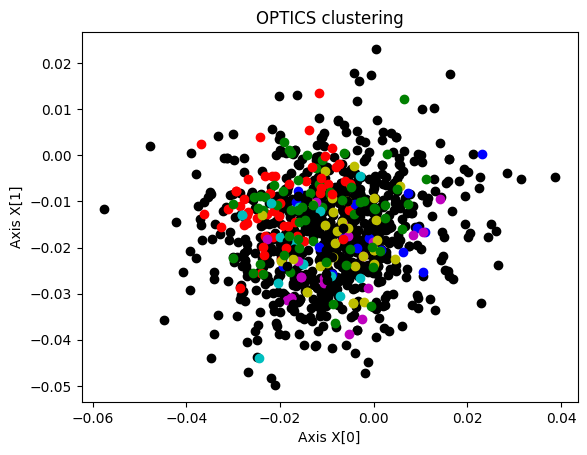

In [31]:
from sklearn.cluster import OPTICS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def convet_to_float_array(input: str) -> np.array:
    values_str = input.strip('[]')
    values_list = values_str.split(',')
    # 将字符串列表转换为浮点数数组
    float_array = np.array([float(value) for value in values_list])
    return float_array

# 读取title embedding
title_embedding = np.array(pd.read_csv("../sample_data_title_embedding.csv", encoding='utf-8')["title_embedding"].apply(lambda x: convet_to_float_array(x)).tolist())

from sklearn.metrics.pairwise import pairwise_distances
# 计算相似度矩阵
similarity_matrix = 1 - pairwise_distances(title_embedding, metric='cosine')


from sklearn.cluster import OPTICS

# 创建OPTICS对象并拟合相似度矩阵
optics = OPTICS(min_samples=15, xi=0.05, min_cluster_size=15)
clusters = optics.fit_predict(similarity_matrix)

print(clusters)


import matplotlib.pyplot as plt

# 将聚类结果可视化
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster_id in np.unique(clusters):
    if cluster_id == -1:
        # 如果是噪声点，则用黑色表示
        color = 'k'
    else:
        # 否则，使用预定义的颜色
        color = colors[cluster_id % len(colors)]
    # 获取属于该聚类簇的样本的索引
    cluster_indices = np.where(clusters == cluster_id)[0]
    # 绘制该聚类簇的样本
    plt.scatter(title_embedding[cluster_indices, 0], title_embedding[cluster_indices, 1], c=color, marker='o')
plt.title('OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [4]:
# 对cluster进行分类，以元素值为key，index List作为value的字典
index_cluster_map = {}
for i, cluster_id in enumerate(clusters):
    # -1的元素作为噪声点，丢弃
    if cluster_id != -1:
        if cluster_id not in index_cluster_map:
            index_cluster_map[cluster_id] = []
        index_cluster_map[cluster_id].append(i)

print(index_cluster_map)

{1: [53, 88, 285, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 382, 383, 384, 437, 438, 454, 494, 495, 542, 544, 545, 546, 547, 548, 549, 550, 551, 650, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 781, 784, 785, 786, 787, 788, 791, 792, 794, 795, 796, 797, 798, 802, 803, 804, 812, 814, 815, 817, 818, 819, 822, 826, 829, 830, 831, 832, 833, 836, 837, 838], 0: [96, 100, 103, 104, 106, 107, 109, 112, 114, 115, 118, 120, 121, 122, 123, 127, 128, 130, 131, 133, 134, 137, 139, 141, 144, 145, 149, 150, 153, 154, 157], 3: [132, 158, 159, 175, 198, 308, 661, 686, 700, 714, 729, 731, 733, 741, 744, 801, 808, 811, 824, 828], 2: [595, 622, 655, 695, 699, 702, 724, 800, 805, 806, 807, 809, 816, 823, 825]}


In [5]:
source_title_df = pd.read_csv("../sample_data_title_embedding.csv")
# 根据cluster_map 里面内容，转化为对应event title的map
title_cluster_map = {}

import pandas as pd

# 将索引列表转换为标题列表
for cluster_id, index_list in index_cluster_map.items():
    title_list = source_title_df.iloc[index_list]['title'].tolist()
    title_cluster_map[cluster_id] = title_list

print(title_cluster_map)

{1: ['Itochu Techno Solutions 1Q Net Y6.37B Vs Net Y4.30B', 'Nanya Technology 2Q Net Loss NT$770.9M Vs Net Profit NT$6.57B', 'Escorts Kubota Records Sharp Rise in Fiscal Q1 Consolidated Net Profit', 'Tokyo Electric Power 1Q Rev Y1.62T Vs Y1.53T', 'Tokyo Electric Power 1Q Net Y136.29B Vs Loss Y48.17B', 'Aozora Bank 1Q Net Y6.77B Vs Net Y8.37B', 'Aozora Bank Sees FY Net Y24.00B', 'Sanyu Co Ltd 1Q Net Y178.00M Vs Net Y137.00M', 'Kawamoto Corp 1Q Net Y42.00M Vs Net Y76.00M', 'Sanrio Co 1Q Net Y4.92B Vs Net Y785.00M', 'Iriso Electronics Sees 1H Net Y2.70B', 'Aozora Bank 1Q Rev Y66.80B Vs Y50.83B', 'Aozora Bank 1Q Rev Y66.80B Vs Y50.83B', 'Sanritsu Corp 1Q Net Y151.00M Vs Net Y185.00M', 'Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B', 'Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B', 'Korean Air Lines Co. Ltd. 2Q Standalone Op Pft KRW467.98B Vs Op KRW735.87B', 'Korean Air Lines Co. Ltd. 2Q Standalone Net KRW371.48B Vs KRW450.41B', 'Korean Air Lines Co. Ltd. 2Q Standalo

In [6]:
title_list_str_map = {}
# 将标题列表拼接成一个字符串
for cluster_id, title_list in title_cluster_map.items():
    title_str = '\n'.join([f'{i+1}. {title}' for i, title in enumerate(title_list)])
    title_list_str_map[cluster_id] = title_str

print(title_list_str_map)

{1: '1. Itochu Techno Solutions 1Q Net Y6.37B Vs Net Y4.30B\n2. Nanya Technology 2Q Net Loss NT$770.9M Vs Net Profit NT$6.57B\n3. Escorts Kubota Records Sharp Rise in Fiscal Q1 Consolidated Net Profit\n4. Tokyo Electric Power 1Q Rev Y1.62T Vs Y1.53T\n5. Tokyo Electric Power 1Q Net Y136.29B Vs Loss Y48.17B\n6. Aozora Bank 1Q Net Y6.77B Vs Net Y8.37B\n7. Aozora Bank Sees FY Net Y24.00B\n8. Sanyu Co Ltd 1Q Net Y178.00M Vs Net Y137.00M\n9. Kawamoto Corp 1Q Net Y42.00M Vs Net Y76.00M\n10. Sanrio Co 1Q Net Y4.92B Vs Net Y785.00M\n11. Iriso Electronics Sees 1H Net Y2.70B\n12. Aozora Bank 1Q Rev Y66.80B Vs Y50.83B\n13. Aozora Bank 1Q Rev Y66.80B Vs Y50.83B\n14. Sanritsu Corp 1Q Net Y151.00M Vs Net Y185.00M\n15. Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B\n16. Tokyo Electric Power 1Q Oper Pft Y151.14B Vs Loss Y44.27B\n17. Korean Air Lines Co. Ltd. 2Q Standalone Op Pft KRW467.98B Vs Op KRW735.87B\n18. Korean Air Lines Co. Ltd. 2Q Standalone Net KRW371.48B Vs KRW450.41B\n19. Korean 

In [7]:
from langchain.llms import AzureOpenAI
from langchain.chat_models import AzureChatOpenAI
import openai
import os
import pandas as pd

os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_BASE"] = "https://openaidemo-hu.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
os.environ["OPENAI_API_KEY"] = "XXXX"


openai.api_type = "azure"
openai.api_version = "2023-05-15"
openai.api_base = "https://openaidemo-hu.openai.azure.com/"
openai.api_key = "XXXX"

gpt4 = AzureChatOpenAI(
    openai_api_base=openai.api_base,
    openai_api_version="2023-05-15",
    deployment_name="gpt4",
    openai_api_key=openai.api_key,
    openai_api_type=openai.api_type,
    temperature=0
)

from langchain.prompts import ChatPromptTemplate
from langchain.prompts.chat import SystemMessage, HumanMessagePromptTemplate

template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content=('''You are a financial journalist who, based on the financial news headlines provided by the user, Summarize into a simple, clear, easily understandable sentence that grabs attention in fewer than 15 words. 
            if the language of headlines is Chinses,please answer in Chinese. ''')
        ),
        HumanMessagePromptTemplate.from_template("The corresponding financial news headlines are as follows: {event_Source}"),
    ]
)

In [8]:
event_map={}
# 遍历cluster_map字典，通过gpt4生成event
for cluster_id, title_str in title_list_str_map.items():
    eventFinal = gpt4(template.format_messages(event_Source=title_str)).content
    event_map[cluster_id]= eventFinal
    print(eventFinal)

Mixed financial results reported across various companies in Q1 and Q2.
8月2日股市波动：多家基金重仓涨跌股，科技、医药等领域表现抢眼。
Gold Fields, Endeavour Mining report strong 2Q results, dividends declared.
BAE Systems boosts dividend, reports strong H1 earnings and revenue.


In [30]:
cluster_records_df_map ={}

# 把index listv的值，转化为csv满足内容的dataframe
for cluster_id, index_list in index_cluster_map.items():
    record_cluster_df = pd.DataFrame(columns=source_title_df.columns)
    record_cluster_df = source_title_df.iloc[index_list]
    cluster_records_df_map[cluster_id] = record_cluster_df

# 把每个clustered dataframe插入event列，同时第一行赋值为相应的gpt4生成的event内容
for cluster_id, record_cluster_df in cluster_records_df_map.items():
    first_index = record_cluster_df.index[0]
    col_event = pd.Series(event_map[cluster_id])        
    record_cluster_df.insert(0, 'event',col_event)
    record_cluster_df.loc[int(first_index),"event"] = event_map[cluster_id]

# 将值列表合并到一个大列表中
merged_cluster_records_df = pd.concat(cluster_records_df_map.values(), axis=0)

print(merged_cluster_records_df)

# 保存到csv文件中
merged_cluster_records_df.to_csv('final_event_sample_result.csv', index=False)

                                                 event   post_id  \
53   Mixed financial results reported across variou...  25648158   
88                                                 NaN  25647881   
285                                                NaN  25647010   
361                                                NaN  25646512   
362                                                NaN  25646502   
..                                                 ...       ...   
807                                                NaN  25644314   
809                                                NaN  25644307   
816                                                NaN  25644086   
823                                                NaN  25643941   
825                                                NaN  25643935   

                                                 title     news_time  \
53   Itochu Techno Solutions 1Q Net Y6.37B Vs Net Y...  1.690960e+12   
88   Nanya Technology 2Q Net Loss NT$77